In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from pprint import pprint
from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# load job description html file
with open("./data/Data Scientist _AI.html", "r") as file:
    job_post= file.read()
job_post

'<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" style="height: 100%;" lang="en" ><head><link href="/jobView/static/css/gd-jobView.4dffe.css" rel="stylesheet" media="all"/><meta  charset="utf-8"/><meta  name="referrer" content="origin"/><meta  name="theme-color" content="#0caa41"/><meta  name="msapplication-navbutton-color" content="#0caa41"/><meta  name="apple-mobile-web-app-capable" content="yes"/><meta  name="apple-mobile-web-app-status-bar-style" content="#0caa41"/><meta  http-equiv="Cache-Control" content="no-cache,must-revalidate"/><meta  http-equiv="Pragma" content="no-cache"/><meta  http-equiv="Expires" content="0"/><meta  name="viewport" content="width=device-width, initial-scale=1.0"/><link  rel="manifest" href="/manifest.json"/><link  rel="shortcut icon" href="/favicon.ico" type="image/vnd.microsoft.icon"/><link  rel="icon" href="/favicon.ico" type="image/x-icon"/><link  rel="preconnect" href="https://fonts.gstatic.co

In [4]:
def extract_keywords_from_job(job_post):
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(job_post, 'html.parser')

    # Find the element containing the job description
    job_description_element = soup.find('div', {'id': 'JobDescriptionContainer'})

    # Extract the text from the job description element
    if job_description_element is not None:
        job_description = job_description_element.get_text()
    else:
        return ""  # Return an empty string if job description is not found
    
    return job_description

In [5]:
job_description = extract_keywords_from_job(job_post)
job_description

'What do our customers expect from their technology solutions? The next level! That is what our team at FERCHAU succeeds in doing day after day. We are looking for you: As someone ambitious who, like us, wants to take technology to the next level. We are involved in exciting projects for well-known car industry OEMs and component suppliers and advance digitalisation and networking. No one will pull the wool over your eyes with your many years of experience. You will oversee digital transformation from the very start and know exactly what impact IT will have on economic development in the future. You would like to stay up-to-date and are always interested in new developments.\n\nYou will take on these challenges\n\n\napplication of artificial intelligence, machine learning, data mining, predictive analytics, ETL jobs, and optimization processes\ndata pipelining / streaming, usage of analytical databases and development of analytical services\ncloud environment preferably AWS, especially

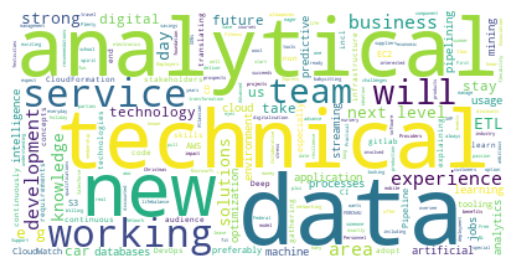

In [6]:
#generate word cloud from job description
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(job_description)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./data/images/jobdescription.png')
plt.show()

In [7]:
skills = pd.read_excel('./data/skill_cat.xlsx')
skills

,Data Analysis,Data Visualization,Programming,Machine learning,Cloud computing,NLP
0,Critical Thinking,Matplotlib,Python,TensorFlow,AWS,RegX
1,Hypothesis Testing,Seaborn,PostgresSQL,Keras,EC2,text models
2,Data Cleaning,Plotly,Bash,logistic regression,RDS,Natural Language Processing
3,Data Wrangling,Data Storytelling,Git,linear regression,Docker,spaCy
4,Data Preprocessing,NaN,SQL,scikit-learn,Data Pipeline,topic modeling
5,Data Transformation,NaN,Selenium,Deep Learning,ETL,nlp methods
6,Data Integration,NaN,OOP,Supervised Learning,Streamlit,nlp
7,Data Exploration,NaN,HTML parsing,Unsupervised Learning,Render,Navie Bayes
8,Web Scraping,NaN,continuous Integration,Feature Selection,APIs,NaN
9,numpy,NaN,NaN,Dimensionality Reduction,MongoBD,NaN


In [8]:
skillsdict = {}
for col in skills.columns:
    #Get list from column
    skillist = skills[col].values.tolist()

    # Remove nan values from list
    skillist = [x for x in skillist if str(x) != 'nan']

    # Add to dictionary
    skillsdict[col] = skillist

skillsdict

{'Data Analysis': ['Critical Thinking',
  'Hypothesis Testing',
  'Data Cleaning',
  'Data Wrangling',
  'Data Preprocessing',
  'Data Transformation',
  'Data Integration',
  'Data Exploration',
  'Web Scraping',
  'numpy',
  'pandas',
  'Business Understanding',
  'Experimental Design'],
 'Data Visualization': ['Matplotlib ',
  'Seaborn ',
  'Plotly',
  'Data Storytelling'],
 'Programming': ['Python',
  'PostgresSQL ',
  'Bash',
  'Git',
  'SQL ',
  'Selenium',
  'OOP',
  'HTML parsing',
  'continuous Integration'],
 'Machine learning': ['TensorFlow',
  'Keras',
  'logistic regression',
  'linear regression',
  'scikit-learn',
  'Deep Learning',
  'Supervised Learning',
  'Unsupervised Learning',
  'Feature Selection',
  'Dimensionality Reduction',
  'Artifical Neural Networks',
  'XGBoost',
  'computer vision',
  'unstructured data',
  'Feature Engineering',
  'Model Evaluation',
  'Model Validation',
  'Hyperparameter Tuning',
  'Ensemble Methods',
  'Model Deployment',
  'convolut

In [9]:
skills_dict = {
    key.lower(): [value.lower() for value in values] for key, values in skillsdict.items()
}
skills_dict

{'data analysis': ['critical thinking',
  'hypothesis testing',
  'data cleaning',
  'data wrangling',
  'data preprocessing',
  'data transformation',
  'data integration',
  'data exploration',
  'web scraping',
  'numpy',
  'pandas',
  'business understanding',
  'experimental design'],
 'data visualization': ['matplotlib ',
  'seaborn ',
  'plotly',
  'data storytelling'],
 'programming': ['python',
  'postgressql ',
  'bash',
  'git',
  'sql ',
  'selenium',
  'oop',
  'html parsing',
  'continuous integration'],
 'machine learning': ['tensorflow',
  'keras',
  'logistic regression',
  'linear regression',
  'scikit-learn',
  'deep learning',
  'supervised learning',
  'unsupervised learning',
  'feature selection',
  'dimensionality reduction',
  'artifical neural networks',
  'xgboost',
  'computer vision',
  'unstructured data',
  'feature engineering',
  'model evaluation',
  'model validation',
  'hyperparameter tuning',
  'ensemble methods',
  'model deployment',
  'convolut

In [10]:
# Convert dictionary to string
word_string = ' '.join([' '.join([key] + value) for key, value in skills_dict.items()])
word_string

'data analysis critical thinking hypothesis testing data cleaning data wrangling data preprocessing data transformation data integration data exploration web scraping numpy pandas business understanding experimental design data visualization matplotlib  seaborn  plotly data storytelling programming python postgressql  bash git sql  selenium oop html parsing continuous integration machine learning tensorflow keras logistic regression linear regression scikit-learn deep learning supervised learning unsupervised learning feature selection dimensionality reduction artifical neural networks xgboost computer vision unstructured data feature engineering model evaluation model validation hyperparameter tuning ensemble methods model deployment convolutional neural network feature expansion hyperparameter optimization data augmentation structured data markov chains gradient descent clustering random forest correlation principle component analysis pca gradient boosting cross validation regulariza

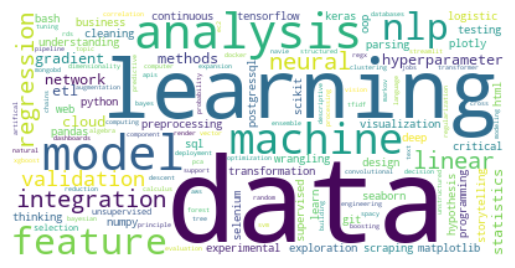

In [35]:
#generate word cloud from data science skills from bootcamp
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(word_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./data/images/bootcampskills.jpg')
plt.show()


Project details

In [20]:
#load the skills and projects files
projects = pd.read_excel("./data/projects.xlsx")
projects

,Title,Skills,Description
0,The Gapminder Project,"Python, numpy, pandas, Bash, Git, matplotlib, ...","Contributed to the Gapminder project, analyzin..."
1,Titanic classification,"python, numpy, pandas, scikit-learn, matplotli...","Analyzed Titanic dataset, identifying factors ..."
2,Bike Sharing project,"scikit-learn, matplotlib, seaborn, machine lea...",Utilized bike sharing data to analyze usage pa...
3,Text Classification,"web scrapping, natural language processing, N...","Performed text classification on lyrics data, ..."
4,Metabase Dashboard,"SQL, PostgresSQL, cloud computing, AWS, EC2, R...","Built Northwind metadata dashboard, showcasing..."
5,The Data pipeline,"APIs, Docker, MongoDB, ETL, data pipeline, NLP...","Built Reddit data pipeline, enabling automated..."
6,Time series Analysis,"pandas, python, machine learning,statistics, p...",Performed time series analysis on temperature ...
7,Supermarket simulation,"statsmodels, markov chains, python, git bash, ...",Employed statistical analysis techniques to an...
8,Real-time image classifer,"deep learning, artifical neural network,,ANN,c...",Developed a real-time image classifier using d...
9,Online Movie Recommender,"collaborative filtering, Render, Streamlit, co...",Built online movie recommender system using co...


In [21]:
projects_dict = projects.to_dict()
projects_dict

{'Title': {0: 'The Gapminder Project',
  1: 'Titanic classification',
  2: 'Bike Sharing project',
  3: 'Text Classification',
  4: 'Metabase Dashboard',
  5: 'The Data pipeline',
  6: 'Time series Analysis',
  7: 'Supermarket simulation',
  8: 'Real-time image classifer',
  9: 'Online Movie Recommender'},
 'Skills': {0: 'Python, numpy, pandas, Bash, Git, matplotlib, seaborn, data wrangling',
  1: 'python, numpy, pandas, scikit-learn, matplotlib, seaborn,machine learning ',
  2: 'scikit-learn, matplotlib, seaborn, machine learning, hyperparameter optimization,python, pandas, numpy',
  3: 'web scrapping, natural language processing,  NLP, beautifulsoup, HTML parsing, regular expression, REgX, nltk,python, pandas',
  4: 'SQL, PostgresSQL, cloud computing, AWS, EC2, RDS, cloud databases',
  5: 'APIs, Docker, MongoDB, ETL, data pipeline, NLP, natural language processing',
  6: 'pandas, python, machine learning,statistics, plotly, matplotlib, seaborn, statsmodels, scikit-learn',
  7: 'stats

In [22]:
newdict = {}
for key, value in projects_dict.items():
    print(key, value)
    newdict[key] = value

Title {0: 'The Gapminder Project', 1: 'Titanic classification', 2: 'Bike Sharing project', 3: 'Text Classification', 4: 'Metabase Dashboard', 5: 'The Data pipeline', 6: 'Time series Analysis', 7: 'Supermarket simulation', 8: 'Real-time image classifer', 9: 'Online Movie Recommender'}
Skills {0: 'Python, numpy, pandas, Bash, Git, matplotlib, seaborn, data wrangling', 1: 'python, numpy, pandas, scikit-learn, matplotlib, seaborn,machine learning ', 2: 'scikit-learn, matplotlib, seaborn, machine learning, hyperparameter optimization,python, pandas, numpy', 3: 'web scrapping, natural language processing,  NLP, beautifulsoup, HTML parsing, regular expression, REgX, nltk,python, pandas', 4: 'SQL, PostgresSQL, cloud computing, AWS, EC2, RDS, cloud databases', 5: 'APIs, Docker, MongoDB, ETL, data pipeline, NLP, natural language processing', 6: 'pandas, python, machine learning,statistics, plotly, matplotlib, seaborn, statsmodels, scikit-learn', 7: 'statsmodels, markov chains, python, git bash, 

In [23]:
#convert the projects dataframe to a list of strings
projects_set = projects.set_index('Title')[["Skills", "Description"]].to_dict(orient='index')
projects_set

{'The Gapminder Project': {'Skills': 'Python, numpy, pandas, Bash, Git, matplotlib, seaborn, data wrangling',
  'Description': 'Contributed to the Gapminder project, analyzing global population trends and presenting data-driven insights for informed decision-making. Utilized data visualization and statistical analysis techniques to communicate complex population dynamics effectively, aiding in the understanding of global demographic patterns.'},
 'Titanic classification': {'Skills': 'python, numpy, pandas, scikit-learn, matplotlib, seaborn,machine learning ',
  'Description': 'Analyzed Titanic dataset, identifying factors influencing survival rates and building predictive models. '},
 'Bike Sharing project': {'Skills': 'scikit-learn, matplotlib, seaborn, machine learning, hyperparameter optimization,python, pandas, numpy',
  'Description': 'Utilized bike sharing data to analyze usage patterns and predict demand for the Bike Sharing project. Developed predictive models using machine lea

In [24]:
#convert the projects dataframe to a string
projects_string = ' '.join([' '.join([key] + list(value.values())) for key, value in projects_set.items()])
projects_string

'The Gapminder Project Python, numpy, pandas, Bash, Git, matplotlib, seaborn, data wrangling Contributed to the Gapminder project, analyzing global population trends and presenting data-driven insights for informed decision-making. Utilized data visualization and statistical analysis techniques to communicate complex population dynamics effectively, aiding in the understanding of global demographic patterns. Titanic classification python, numpy, pandas, scikit-learn, matplotlib, seaborn,machine learning  Analyzed Titanic dataset, identifying factors influencing survival rates and building predictive models.  Bike Sharing project scikit-learn, matplotlib, seaborn, machine learning, hyperparameter optimization,python, pandas, numpy Utilized bike sharing data to analyze usage patterns and predict demand for the Bike Sharing project. Developed predictive models using machine learning algorithms to optimize bike availability and improve user experience. Text Classification web scrapping, na

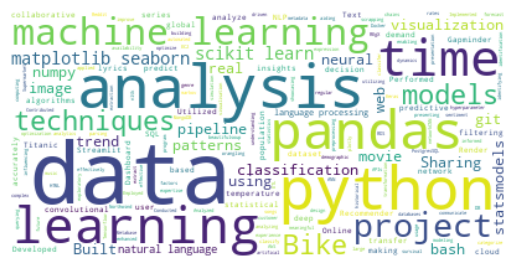

In [59]:
#generate word cloud from data science skills from bootcamp
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(projects_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./data/images/projectskills.png')
plt.show()